<a href="https://colab.research.google.com/github/1Ferst/1Ferst/blob/main/space_missions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install iso3166

In [ ]:
%pip install --upgrade plotly

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from iso3166 import countries
from datetime import datetime, timedelta

In [ ]:
df = pd.read_csv('Space_Corrected.csv')
df = df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Company Name    4324 non-null   object
 1   Location        4324 non-null   object
 2   Datum           4324 non-null   object
 3   Detail          4324 non-null   object
 4   Status Rocket   4324 non-null   object
 5    Rocket         964 non-null    object
 6   Status Mission  4324 non-null   object
dtypes: object(7)
memory usage: 236.6+ KB


In [ ]:
df.describe()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
count,4324,4324,4324,4324,4324,964,4324
unique,56,137,4319,4278,2,56,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Wed Nov 05, 2008 00:15 UTC",Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,450.0,Success
freq,1777,235,2,6,3534,136,3879


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Company Name    4324 non-null   object
 1   Location        4324 non-null   object
 2   Datum           4324 non-null   object
 3   Detail          4324 non-null   object
 4   Status Rocket   4324 non-null   object
 5    Rocket         964 non-null    object
 6   Status Mission  4324 non-null   object
dtypes: object(7)
memory usage: 236.6+ KB


In [ ]:
df_cn = df['Company Name'].value_counts().reset_index()[:26]
df_cn

,index,Company Name
0,RVSN USSR,1777
1,Arianespace,279
2,CASC,251
3,General Dynamics,251
4,NASA,203
5,VKS RF,201
6,US Air Force,161
7,ULA,140
8,Boeing,136
9,Martin Marietta,114


In [ ]:
cn_bar = px.bar(
    x=df_cn['index'],
    y=df_cn['Company Name'],
    title='Number of Launches per Company',
    color=df_cn['Company Name']
)

cn_bar.update_layout(xaxis_title='Company Name',
                     yaxis_title='count',
                     hovermode='x')

cn_bar.show()

In [ ]:
df_sr = df['Status Rocket'].value_counts().reset_index()
df_sr

,index,Status Rocket
0,StatusRetired,3534
1,StatusActive,790


In [ ]:
fig = px.pie(df_sr,
             values='Status Rocket',
             names='index',
             title='Rocket Status',
             )

fig.show()

In [ ]:
df_ms = df['Status Mission'].value_counts().reset_index()
df_ms

,index,Status Mission
0,Success,3879
1,Failure,339
2,Partial Failure,102
3,Prelaunch Failure,4


In [ ]:
fig = px.bar(df_ms,
             x='index',
             y='Status Mission',
             title='Mission Status')

fig.show()

In [ ]:
countries_to_replace = {
    'Russia' : 'Russian Federation',
    'New Mexico' : 'USA',
    'Yellow Sea': 'China',
    'Shahrud Missile Test Site': 'Iran',
    'Pacific Missile Range Facility': 'USA',
    'Barents Sea': 'Russian Federation',
    'Gran Canaria': 'USA'
}

In [ ]:
df['Country'] = df['Location'].str.split().str[-1].replace(countries_to_replace)

In [ ]:
alpha3_dict = {}
for c in countries:
  alpha3_dict[c.name] = c.alpha3
df['ISO'] = df['Country']
df = df.replace({
    'ISO': alpha3_dict
})

In [ ]:
df_map = df.groupby(['Country', 'ISO']).agg({'Status Mission': pd.Series.count}).reset_index()
df_map[:3]

,Country,ISO,Status Mission
0,Australia,AUS,6
1,Brazil,BRA,3
2,Canaria,Canaria,2


In [ ]:
map_m = px.choropleth(df_map,
                          locations='ISO',
                          color='Status Mission',
                          hover_name='Country',
                          title='Status Mission by Countries',
                          color_continuous_scale=px.colors.sequential.matter)

map_m.update_layout(coloraxis_showscale=True)

map_m.show()

In [ ]:
df_map_f = df[df['Status Mission'] == 'Failure'].groupby(['Country', 'ISO']).agg({'Status Mission': pd.Series.count}).reset_index()
df_map_f[:3]

,Country,ISO,Status Mission
0,Australia,AUS,3
1,Brazil,BRA,2
2,China,CHN,19


In [ ]:
map_f = px.choropleth(df_map_f,
                          locations='ISO',
                          color='Status Mission',
                          hover_name='Country',
                          title='Status Mission - Failure by Countries',
                          color_continuous_scale=px.colors.sequential.matter)

map_f.update_layout(coloraxis_showscale=True)

map_f.show()

In [ ]:
sun = df.groupby(['Country', 'Company Name', 'Status Mission'])['Datum'].count().reset_index()
sun[:3]

,Country,Company Name,Status Mission,Datum
0,Australia,AMBA,Success,1
1,Australia,CECLES,Failure,2
2,Australia,CECLES,Success,1


In [ ]:
countries_for_sun = ['USA', 'China', 'Russian Federation', 'France']
sun = sun.query('Country in @countries_for_sun')
sun[:3]

,Country,Company Name,Status Mission,Datum
8,China,CASC,Failure,14
9,China,CASC,Partial Failure,6
10,China,CASC,Success,230


In [ ]:
burst = px.sunburst(sun,
                    path=['Country', 'Company Name', 'Status Mission'],
                    values='Datum',
                    title='Sunburst Chart',
                   )

burst.show()

In [ ]:
np.sum(pd.isna(df[" Rocket"]))

3360

In [ ]:
df_ = df.dropna(subset=[' Rocket'], axis=0)
pd.options.mode.chained_assignment = None
len(df_)

964

In [ ]:
np.sum(pd.isna(df_[" Rocket"]))

0

In [ ]:
df_[" Rocket"] = df_[" Rocket"].str.replace(",", "").astype(np.float64)

In [ ]:
df_money_sum = df_.groupby('Company Name').agg({' Rocket': pd.Series.sum}).reset_index().sort_values(' Rocket', ascending=False)[:16]
df_money_sum[:5]

,Company Name,Rocket
14,NASA,76280.00
0,Arianespace,16345.00
21,ULA,14798.00
16,RVSN USSR,10000.00
2,CASC,6340.26


In [ ]:
fig = px.bar(df_money_sum,
             x='Company Name',
             y=' Rocket',
             title='Total Money Spent for Company',
             )
fig.show()

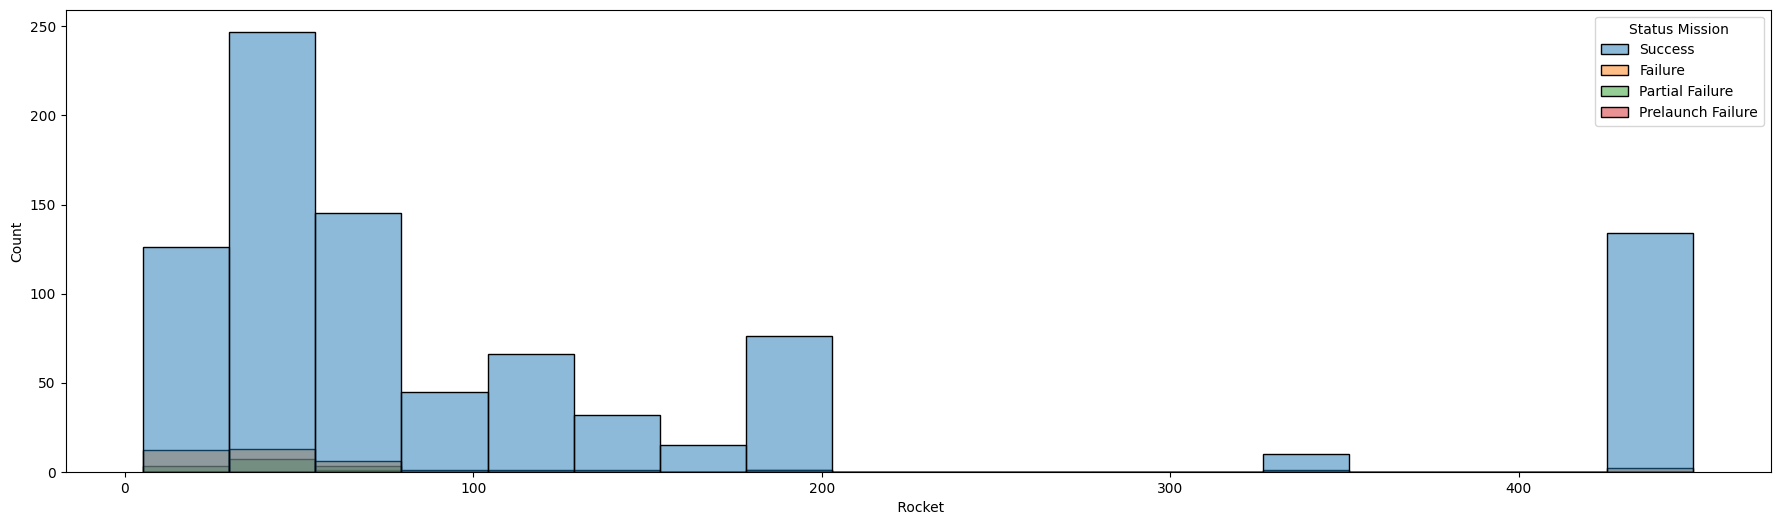

In [ ]:
df_r600 = df_[df_[' Rocket'] < 600]

plt.figure(figsize = (22,6))
sns.histplot(df_r600,
             x=" Rocket",
             hue = "Status Mission")
plt.show()

In [ ]:
df_money_mean = df_.groupby('Company Name').agg({' Rocket': pd.Series.mean, 'Datum': pd.Series.count}).reset_index().sort_values('Datum', ascending=False)[:9]

In [ ]:
fig = px.bar(df_money_mean,
             x='Company Name',
             y=' Rocket',
             title='Average Amount of Money Spent by Organisation per Launch')

fig.show()

In [ ]:
df["Date"] = pd.to_datetime(df["Datum"])

In [ ]:
df["Year"] = df["Date"].apply(lambda datetime: datetime.year)

In [ ]:
df_year_count = df.Year.value_counts().reset_index().sort_values('index')
df_year_count[:3]

,index,Year
63,1957,3
61,1958,28
62,1959,20


In [ ]:
fig = px.bar(df_year_count,
             x='index',
             y='Year',
             title='Number of Launches per Year')

fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Count'
)

fig.show()

In [ ]:
df["YearMonth"] = df["Date"].apply(lambda datetime: f"{datetime.year}-{datetime.month:02d}")
df["YearMonth"] = pd.to_datetime(df["YearMonth"], format='%Y-%m')

In [ ]:
df_yearmonth_count = df.YearMonth.value_counts().reset_index().sort_values('index')
df_yearmonth_count.sample(3)

,index,YearMonth
303,1985-01-01,6
522,1991-09-01,4
348,1986-07-01,5


In [ ]:
moving_average = df_yearmonth_count.YearMonth.rolling(window=6).mean()

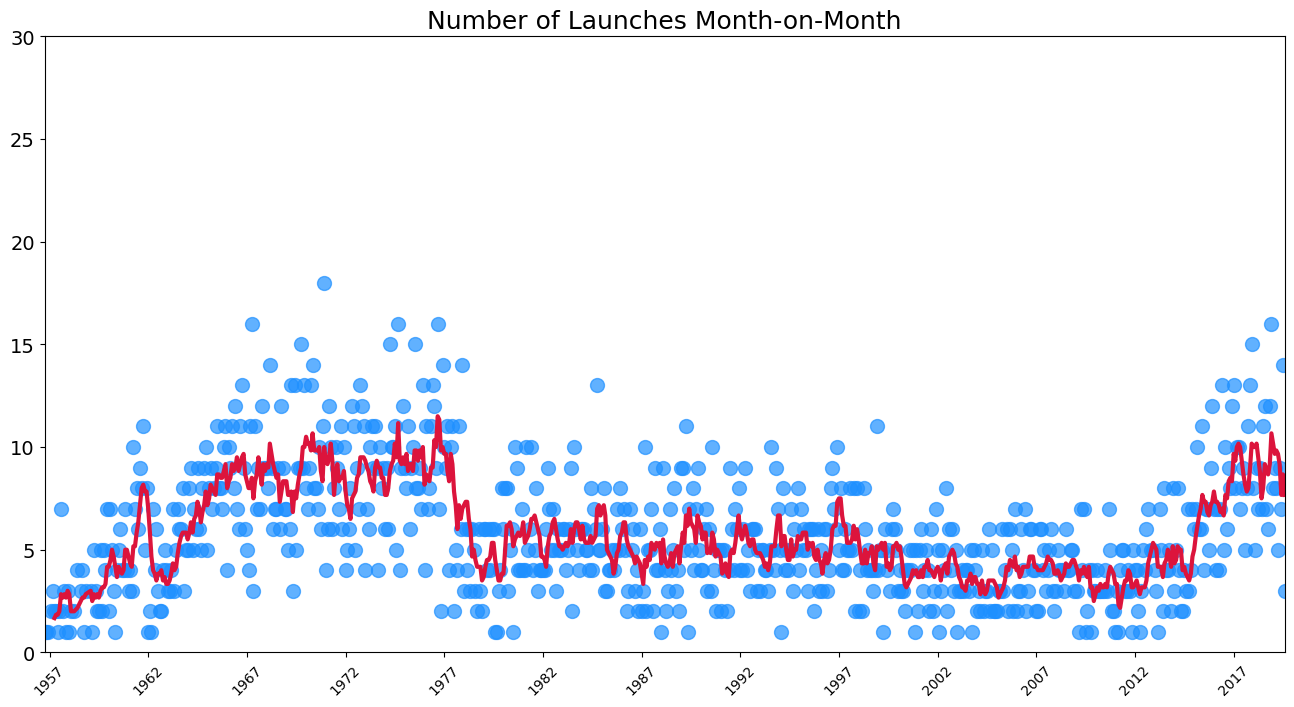

In [ ]:
plt.figure(figsize=(16,8), dpi=100)
plt.title('Number of Launches Month-on-Month', fontsize=18)
plt.yticks(fontsize=14)

years = pd.date_range(start=df_yearmonth_count["index"].min(), end=df_yearmonth_count["index"].max(), freq="5Y")
plt.xticks(years, [year.strftime("%Y") for year in years], rotation=45)

ax = plt.gca()
ax.set_xlim(df_yearmonth_count["index"].min(), df_yearmonth_count["index"].max())
ax.set_ylim(0, 30)

ax.scatter(x=df_yearmonth_count['index'],
           y=df_yearmonth_count['YearMonth'],
           c='dodgerblue',
           alpha=0.7,
           s=100,)

ax.plot(df_yearmonth_count['index'],
        moving_average.values,
        c='crimson',
        linewidth=3,)

plt.show()

In [ ]:
df["Month"] = df["Date"].apply(lambda datetime: datetime.month)

In [ ]:
df_month_count = df.Month.value_counts().reset_index().sort_values('index')
df_month_count[:3]

,index,Month
11,1,268
8,2,336
6,3,353


In [ ]:
fig = px.bar(df_month_count,
             x='index',
             y='Month',
             title='Number of Launches per each Month')

fig.update_layout(
    xaxis_title='Month',
    yaxis_title='Count'
)

fig.show()

In [ ]:
df_['Date'] = pd.to_datetime(df_['Datum'])
df_["YearMonth"] = df_["Date"].apply(lambda datetime: f"{datetime.year}-{datetime.month:02d}")
df_["YearMonth"] = pd.to_datetime(df_["YearMonth"], format='%Y-%m')

In [ ]:
df_yearmonth_mean = df_.groupby('YearMonth').agg({' Rocket': pd.Series.mean}).reset_index()

In [ ]:
rolling_rocket = df_yearmonth_mean[' Rocket'].rolling(window=6).mean()

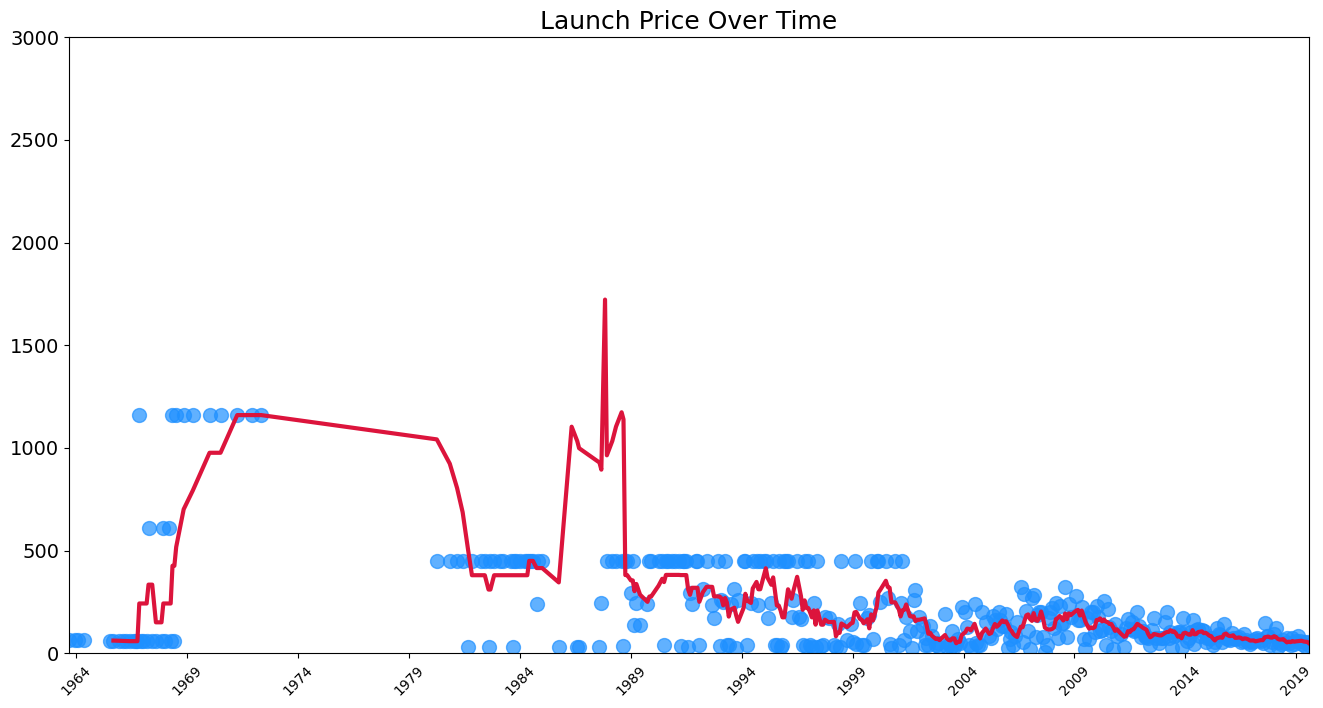

In [ ]:
plt.figure(figsize=(16,8), dpi=100)
plt.title('Launch Price Over Time', fontsize=18)
plt.yticks(fontsize=14)

years = pd.date_range(start=df_yearmonth_mean["YearMonth"].min(), end=df_yearmonth_mean["YearMonth"].max(), freq="5Y")
plt.xticks(years, [year.strftime("%Y") for year in years], rotation=45)

ax = plt.gca()
ax.set_xlim(df_yearmonth_mean["YearMonth"].min(), df_yearmonth_mean["YearMonth"].max())
ax.set_ylim(0, 3000)

ax.scatter(x=df_yearmonth_mean['YearMonth'],
           y=df_yearmonth_mean[' Rocket'],
           c='dodgerblue',
           alpha=0.7,
           s=100,)

ax.plot(df_yearmonth_mean['YearMonth'],
        rolling_rocket.values,
        c='crimson',
        linewidth=3,)

plt.show()

In [ ]:
list_top10 = df['Company Name'].value_counts()[:10].reset_index()
list_top10 = list_top10['index'].tolist()

In [ ]:
df_top10 = df[df['Company Name'].isin(list_top10)]
df_top10 = df_top10.groupby(['Company Name', 'Year']).agg({'Date': pd.Series.count}).reset_index()

In [ ]:
df_top10[:3]

,Company Name,Year,Date
0,Arianespace,1984,3
1,Arianespace,1985,4
2,Arianespace,1986,3


In [ ]:
l_chart = px.line(df_top10,
                  x='Year',
                  y='Date',
                  title='Launches per Company over Years',
                  color='Company Name',
                  hover_name='Company Name')

l_chart.update_layout(xaxis_title='Year',
                      yaxis_title='Number of Launches')

l_chart.show()

In [ ]:
df_cold_war = df[((df['Country'] == 'USA') | (df.Country == 'Russian Federation') | (df['Country'] == 'Kazakhstan'))&(df.Year < 1992)]
df_cold_war['Country'].replace({'Russian Federation': 'USSR', 'Kazakhstan': 'USSR'}, inplace=True)

In [ ]:
pie_cold_war = df_cold_war['Country'].value_counts().reset_index()
pie_cold_war

,index,Country
0,USSR,1770
1,USA,662


In [ ]:
fig = px.pie(pie_cold_war,
             values='Country',
             names='index',
             title='Total Number of Launches of the USSR and the USA during Cold War',
             )

fig.show()

In [ ]:
df_cold_year = df_cold_war.groupby(['Country', 'Year']).agg({'Date': pd.Series.count}).reset_index()
df_cold_year_usa = df_cold_year[df_cold_year.Country == 'USA']
df_cold_year_ussr = df_cold_year[df_cold_year.Country == 'USSR']

In [ ]:
df_ussr_pivot = df_cold_year_ussr.pivot(index='Year', columns='Country', values='Date').reset_index()
df_usa_pivot = df_cold_year_usa.pivot(index='Year', columns='Country', values='Date').reset_index()

df_cold_year = pd.merge(df_ussr_pivot, df_usa_pivot, on='Year', how='outer')
df_cold_year[:3]

Country,Year,USSR,USA
0,1957,2,1
1,1958,5,23
2,1959,4,16


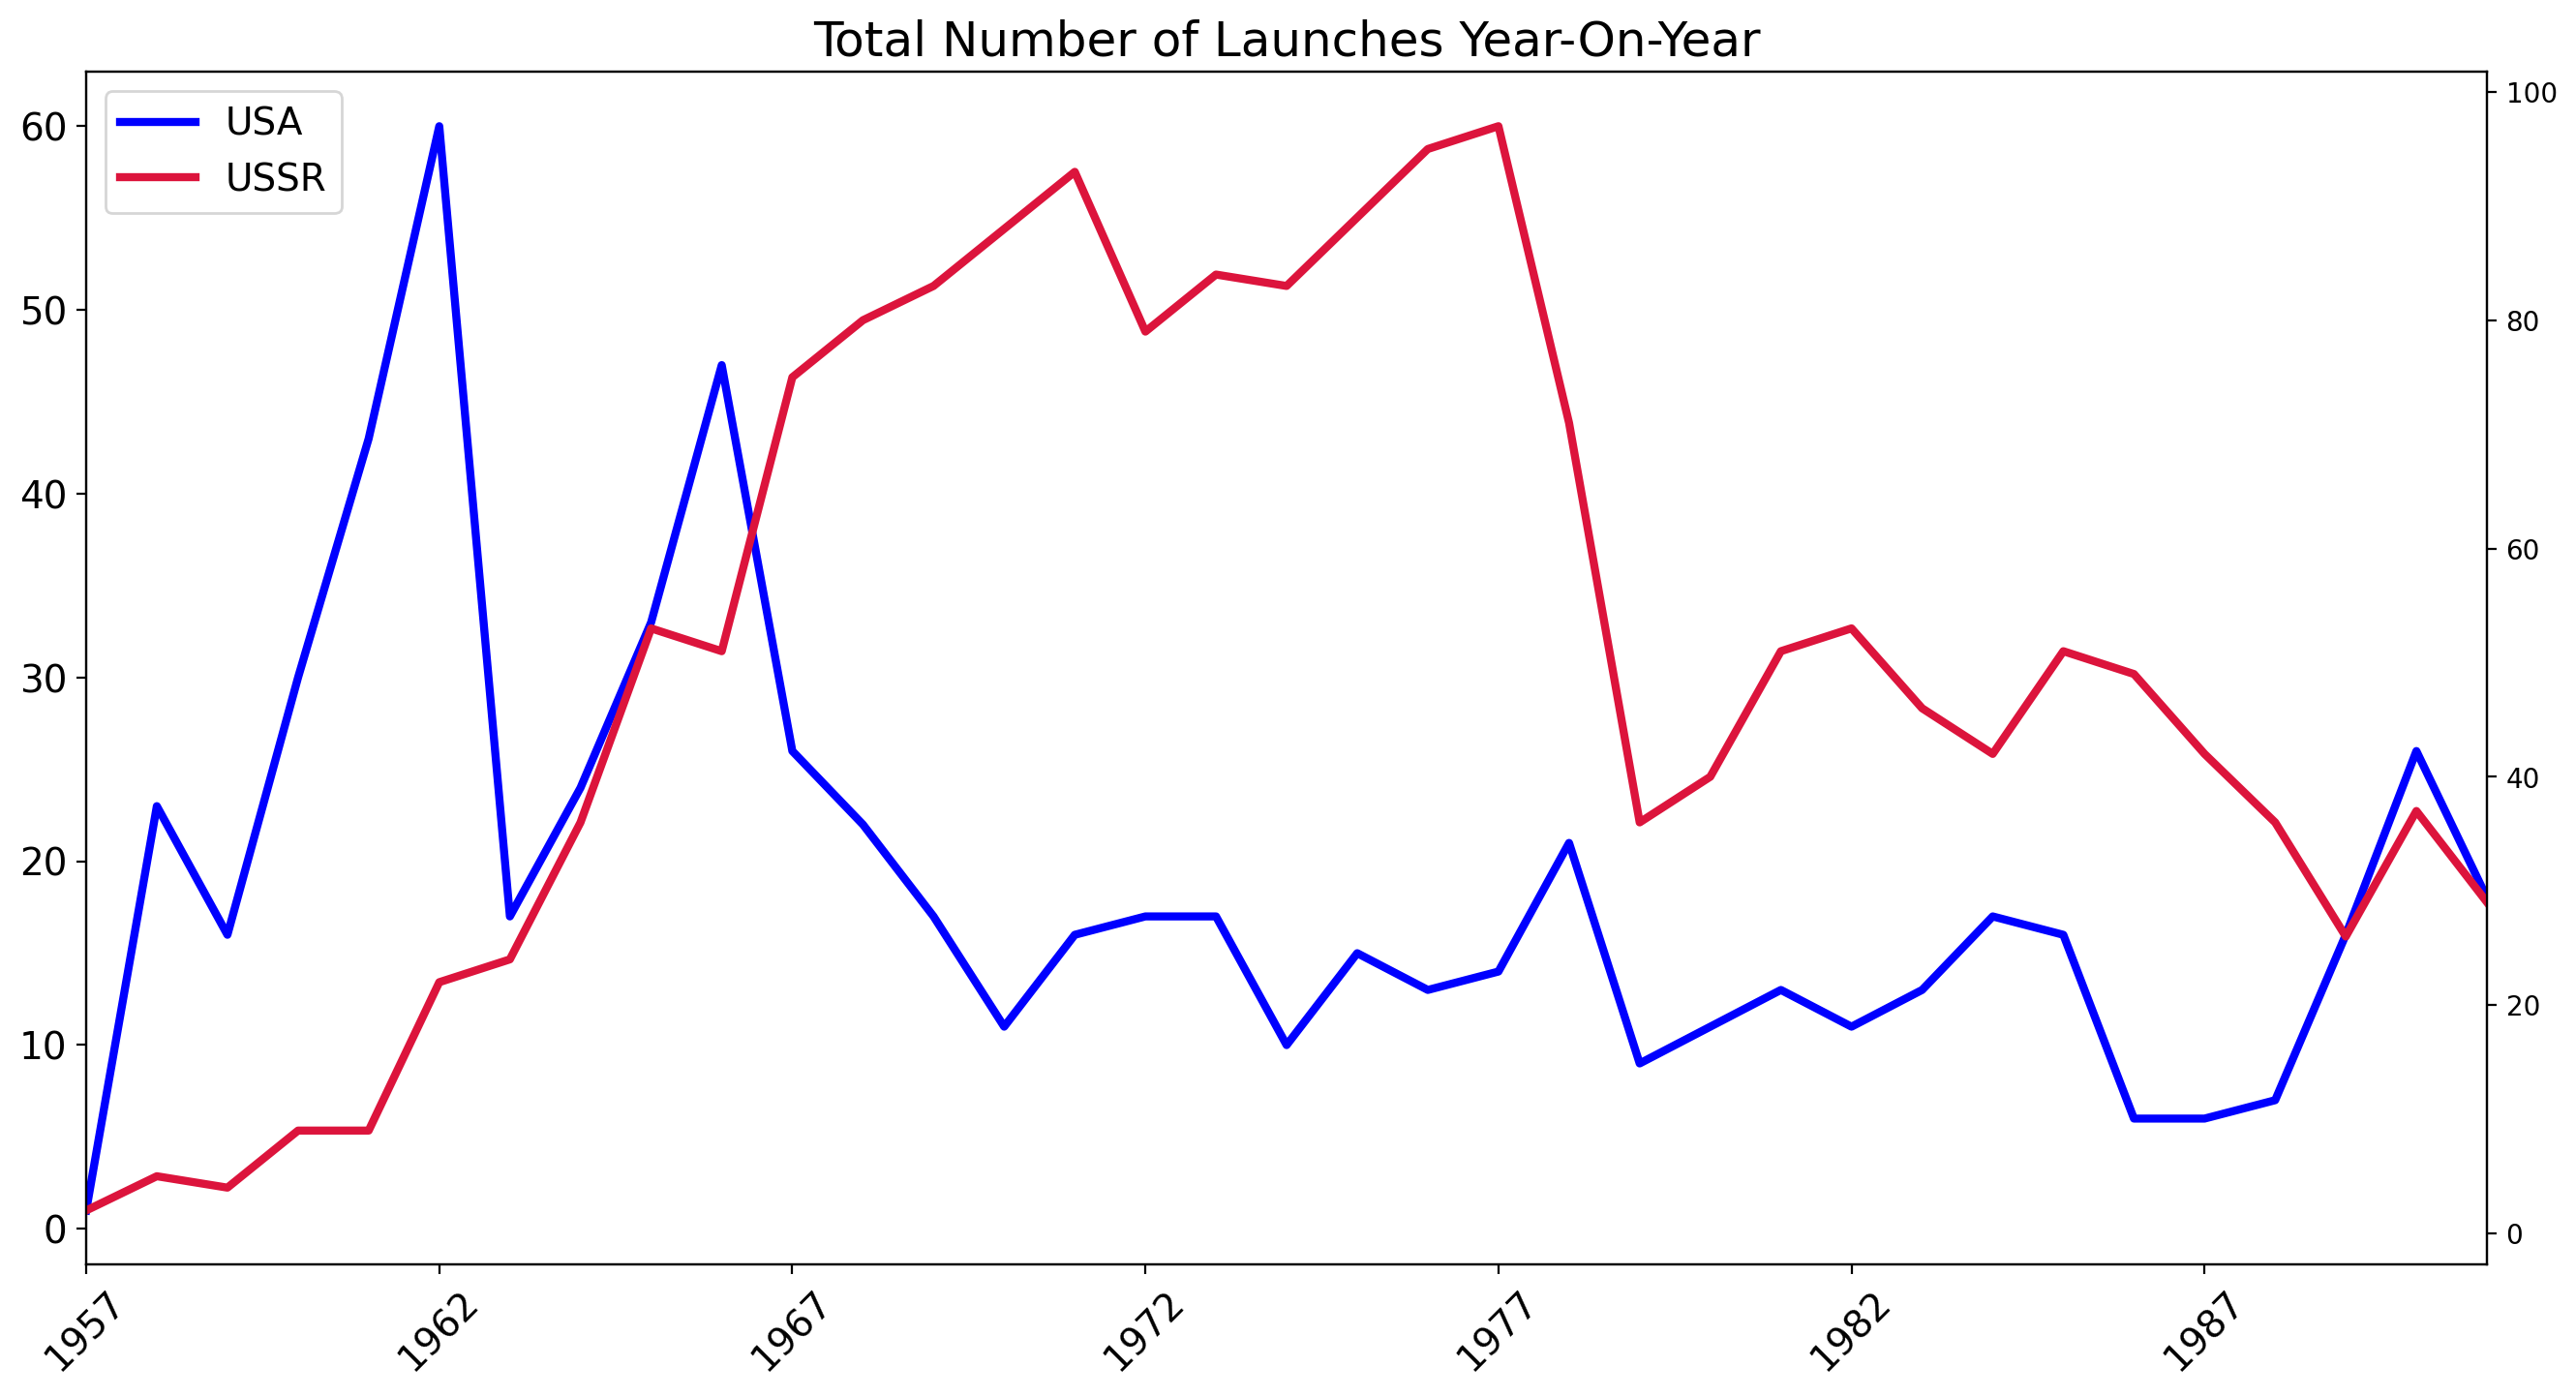

In [ ]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('Total Number of Launches Year-On-Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1957, 1991, step=5),
           fontsize=14,
           rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.set_xlim(1957, 1991)

ax1.plot(df_cold_year.Year,
        df_cold_year.USA,
        c='blue',
        linewidth=3,
        label='USA')

ax2.plot(df_cold_year.Year,
        df_cold_year.USSR,
        c='crimson',
        linewidth=3,
        label='USSR')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=14)


plt.show()